In [1]:
import pandas as pd

In [3]:
df=pd.read_csv("../data/netflix_titles.csv")
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


*Veri Seti Genel İnceleme*

Bu bölümde Netflix veri setinin:
- Sütun yapısı
- Veri tipleri
- Eksik değer durumu
incelenmiştir.

**Netflix’te içerik sayısı yıllara göre nasıl değişmiş?**

In [6]:
year_counts=df.groupby("release_year").size()
year_counts.head()  #netflix'in o yıllarda çok az yapımı olduğundan sayıları azdır.

release_year
1925    1
1942    2
1943    3
1944    3
1945    4
dtype: int64

In [18]:
year_counts.tail(15)  

release_year
2007      88
2008     136
2009     152
2010     194
2011     185
2012     237
2013     288
2014     352
2015     560
2016     902
2017    1032
2018    1147
2019    1030
2020     953
2021     592
dtype: int64

*Yıllara Göre İçerik Trend Analizi*

Netflix içerik sayısında 2011 yılından itibaren belirgin bir artış gözlemlenmektedir.
Özellikle 2015 sonrası dönemde içerik üretiminde ciddi bir sıçrama yaşanmış.


In [9]:
import matplotlib.pyplot as plt

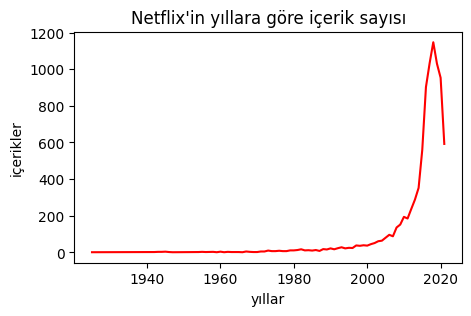

In [16]:
plt.figure(figsize=(5,3))
plt.plot(year_counts.index,year_counts.values,"r")
plt.title("Netflix'in yıllara göre içerik sayısı")
plt.xlabel("yıllar")
plt.ylabel("içerikler")
plt.show()

*Yıllara Göre İçerik Analizi*

Netflix içerik sayısında özellikle 2011 sonrası belirgin bir artış gözlemlenmektedir.
Bu durum, dijital yayın platformlarının yaygınlaşmasıyla açıklanabilir.


**Netflix’te Film mi daha fazla, yoksa TV Show mu?***

In [19]:
df['type'].head()

0      Movie
1    TV Show
2    TV Show
3    TV Show
4    TV Show
Name: type, dtype: object

In [21]:
df['type'].value_counts()

type
Movie      6131
TV Show    2676
Name: count, dtype: int64

In [23]:
df['type'].value_counts(normalize=True)*100

type
Movie      69.615079
TV Show    30.384921
Name: proportion, dtype: float64

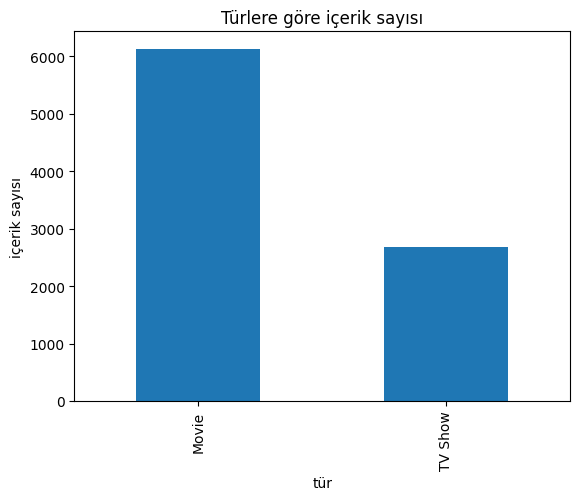

In [24]:
import matplotlib.pyplot as plt

type_counts = df['type'].value_counts()
plt.figure()
type_counts.plot(kind='bar')
plt.title('Türlere göre içerik sayısı')
plt.xlabel('tür')
plt.ylabel('içerik sayısı')
plt.show()

**Film vs TV Show Analizi**

Netflix platformunda içeriklerin büyük bir kısmının film olduğu,
TV Show içeriklerinin ise daha sınırlı kaldığı görülmektedir.
Bu durum, platformun geniş kitlelere hitap eden kısa süreli
tüketilebilir içeriklere ağırlık verdiğini göstermektedir.


**Netflix içerikleri en çok hangi ülkelerde üretiliyor?**

In [27]:
df['country'].head()

0    United States
1     South Africa
2              NaN
3              NaN
4            India
Name: country, dtype: object

In [32]:
country_df=df.dropna(subset=['country']).copy() #eksik/boş değerleri temizledik

In [33]:
country_df['country'] = country_df['country'].str.split(', ') #birden fazla ülkeyi ayırdık.


In [34]:
country_exploded = country_df.explode('country')
# Explode bir hücredeki listeyi alır, her elemanı ayrı satıra böler.

In [35]:
top_countries = country_exploded['country'].value_counts().head(10)
top_countries
#country_counts tablosundan country sütunu alınır, her ülke kaç kez geçmiş sayılır↓
# en çok geçen 10 tane sıralanır.

country
United States     3689
India             1046
United Kingdom     804
Canada             445
France             393
Japan              318
Spain              232
South Korea        231
Germany            226
Mexico             169
Name: count, dtype: int64

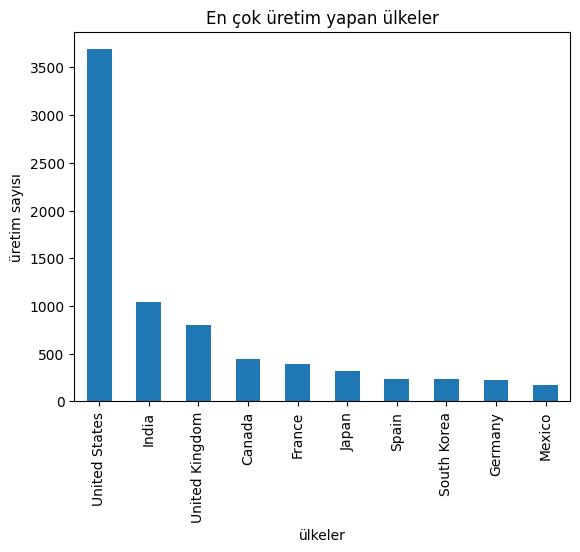

In [37]:
import matplotlib.pyplot as plt
plt.figure()
top_countries.plot(kind='bar')
plt.title('En çok üretim yapan ülkeler')
plt.xlabel('ülkeler')
plt.ylabel('üretim sayısı')
plt.show()

**Ülkelere Göre İçerik Dağılımı**

Netflix içerik üretiminde en yüksek paya sahip ülkenin
Amerika Birleşik Devletleri olduğu görülmektedir.
Bu dağılım, Netflix’in küresel stratejisinde
yerel içerik üretimine önem verdiğini göstermektedir.